In [27]:
import torch
import matplotlib.pyplot as plt
import numpy as np
words=open('names.txt').read().splitlines()


In [28]:
#pytorch coming
N = torch.zeros((27,27), dtype=torch.int32)


In [29]:
char=sorted(list(set(''.join(words))))
stoi={s:i+1 for i,s in enumerate(char)}
stoi['.']=0


In [30]:
itos={i:s for s,i in stoi.items()}


RuntimeError: Numpy is not available

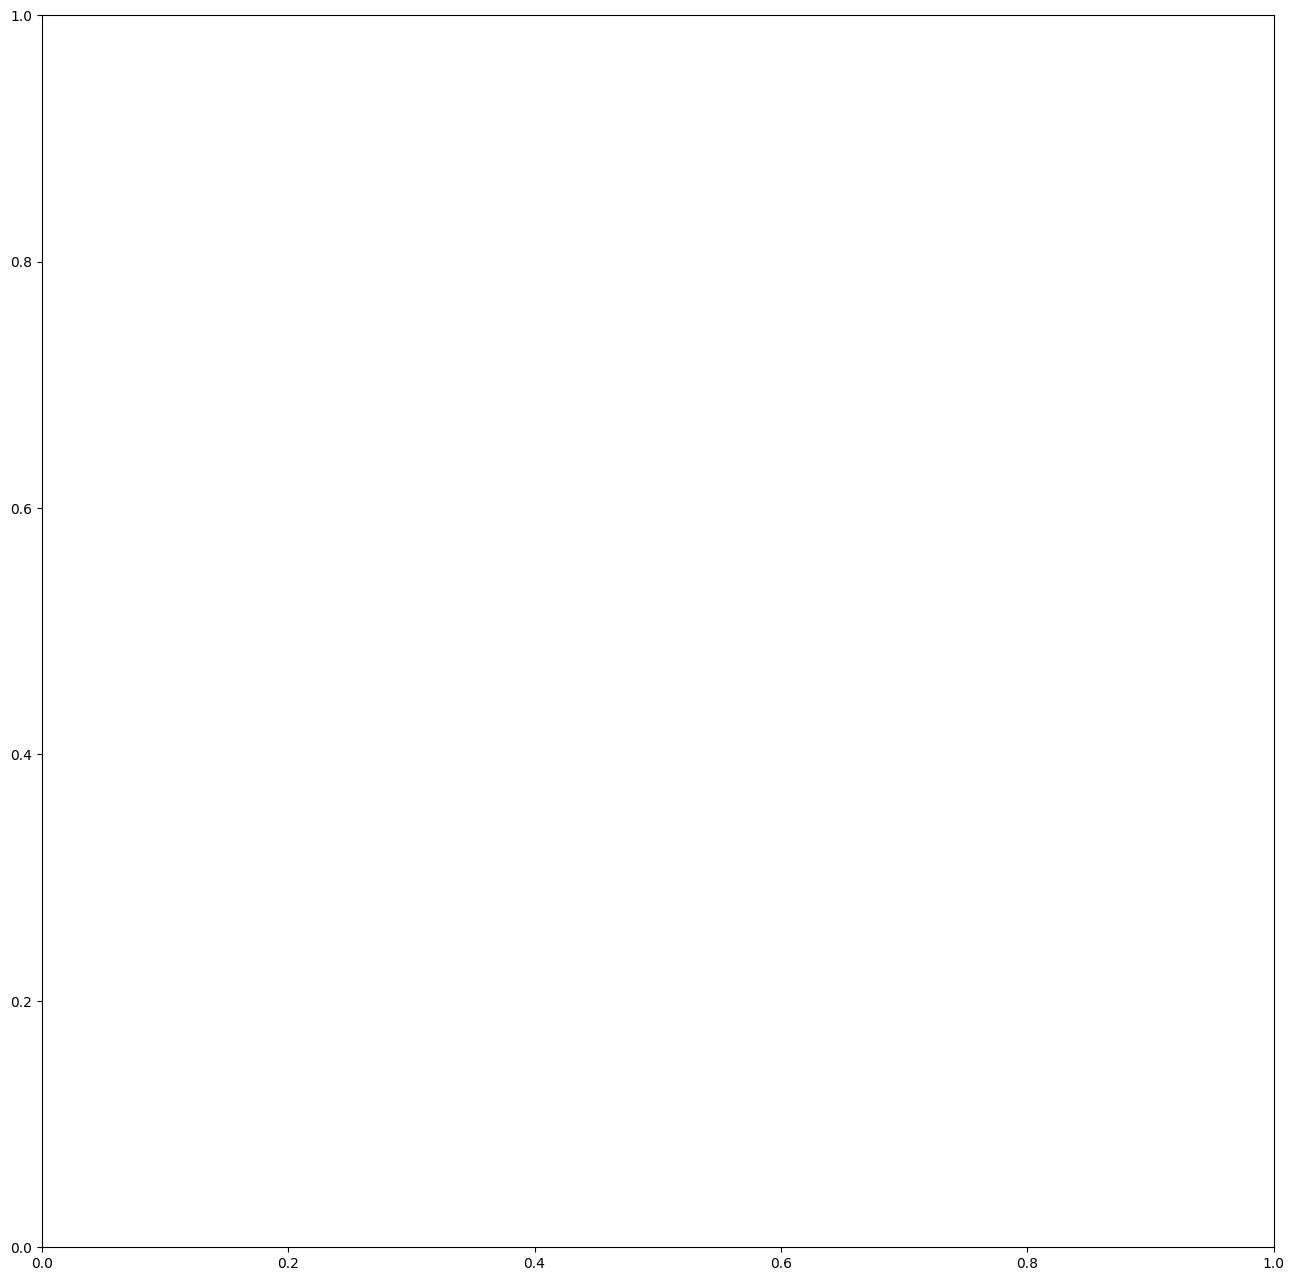

In [31]:
b={}
for w in words:
    chs=['.']+list(w)+['.']
    for ch1,ch2 in zip(chs,chs[1:]):
        ix1=stoi[ch1]
        ix2=stoi[ch2]
        N[ix1,ix2]+=1

plt.figure(figsize=(16,16))
plt.imshow(N,cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr =itos[i]+itos[j]
        plt.text(j,i,chstr,ha="center",va="bottom",colour="gray")
        plt.text(j,i,N[i,j].item(),ha="center",va="top",colour="gray")         
plt.axis ('off')


In [24]:
N[0,:]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [33]:
p=N[0].float()
p=p/p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [43]:

itos[xi]

'.'

In [38]:
#g=torch.Generator().manual_seed(2147483647)
#p=torch.rand(3,generator=g)
#p=p/p.sum()
#p

tensor([0.6064, 0.3033, 0.0903])

In [37]:
#torch.multinomial(p,num_samples=20,replacement=True,generator=g)

tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1])

In [69]:
P=(N+1).float()
P/=P.sum(1,keepdim=True)
P.sum(1,keepdim=True).shape

torch.Size([27, 1])

In [70]:
g=torch.Generator().manual_seed(2147483647)
for i in range(20):
    out=[]
    ix=0
    while True:
        p=P[ix]
       ## p=p/p.sum()
        ix=xi=torch.multinomial(p,num_samples=1,replacement=True,generator=g).item()
        out.append(itos[ix])
        if ix==0:
            break
    print (''.join(out))

junide.
janasah.
p.
cony.
a.
nn.
kohin.
tolian.
juee.
ksahnaauranilevias.
dedainrwieta.
ssonielylarte.
faveumerifontume.
phynslenaruani.
core.
yaenon.
ka.
jabdinerimikimaynin.
anaasn.
ssorionsush.


In [71]:
log_likelihood=0.0
n=0
for w in words[:3]:
    chs=['.']+list(w)+['.']
    for ch1,ch2 in zip(chs,chs[1:]):
        ix1=stoi[ch1]
        ix2=stoi[ch2]
        prob=P[ix1,ix2]
        logprob=torch.log(prob)
        log_likelihood+=logprob
        n+=1
        print (f'{ch1}{ch2}:{prob:4f} : {logprob:.4f}')
print(f'{log_likelihood=}')
null=-log_likelihood
print(f'{null=}')
print(f'{null/n}')
 

.e:0.047785 : -3.0410
em:0.037653 : -3.2793
mm:0.025341 : -3.6753
ma:0.388514 : -0.9454
a.:0.195830 : -1.6305
.o:0.012321 : -4.3965
ol:0.077880 : -2.5526
li:0.177404 : -1.7293
iv:0.015230 : -4.1845
vi:0.350769 : -1.0476
ia:0.137974 : -1.9807
a.:0.195830 : -1.6305
.a:0.137586 : -1.9835
av:0.024623 : -3.7041
va:0.247308 : -1.3971
a.:0.195830 : -1.6305
log_likelihood=tensor(-38.8086)
null=tensor(38.8086)
2.4255354404449463


In [73]:
xs,ys=[],[]
for w in words[:3]:
    chs=['.']+list(w)+['.']
    for ch1,ch2 in zip(chs,chs[1:]):
        ix1=stoi[ch1]
        ix2=stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)

xs =torch.tensor(xs)
ys =torch.tensor(ys)
xs
ys

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0])